In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from random import choice, uniform
from numpy import mean, array, arange

rcParams['figure.figsize'] = 10, 5

In [2]:
earnings=pd.read_csv('./bases/earnings_female.csv')
employed=pd.read_csv('./bases/employed_gender.csv')
jobs=pd.read_csv('./bases/jobs_gender.csv')

# EARNINGS

In [3]:
labels=[]

for index, row in earnings.iterrows():
    if row['group'] not in labels:
        labels.append(row['group'])

In [4]:
values=[15,0,0,0,0,0,0]

for k in range(len(values)-1):
    values[k+1]=values[k]+values[0]
    
colors=['orange','b','g','r','c','m','y']

means={}

zorder=list(range(0,len(labels)))

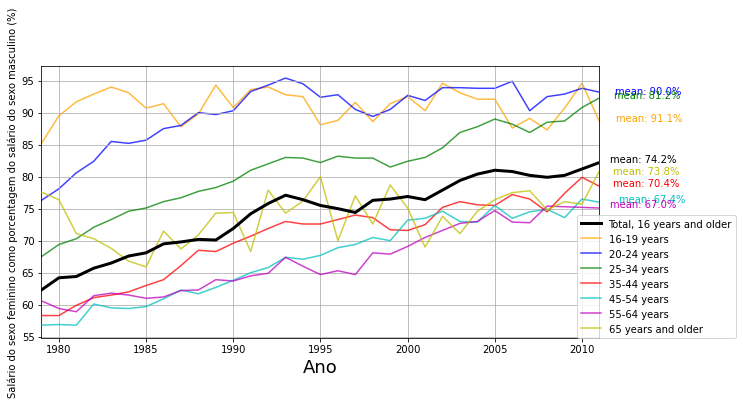

In [5]:
j=0
texts={}

for i in labels:
    df=earnings[earnings.group == i]
    Mean=(mean(array(df.percent)))
    means[i]=Mean
    st="mean: "+(str(round(means.get(i),1)))+'%'
    #label=i+", "+st
    label=i
    
    if i=='Total, 16 years and older':
        plt.plot(df.Year, df.percent, label=label, c='k', linewidth=3, zorder=zorder[-1])
        texts[st]=[float(df.percent.tail(1)), float(df.Year.tail(1))+1, 'k']
        
    else:
        s=values[j]
        c=colors[j]


        #plt.scatter(df.Year, df.percent, label=label, alpha=0.75, s=s, c=c)
        plt.plot(df.Year, df.percent, label=label, alpha=0.75, c=c, zorder=zorder[j])
        texts[st]=[float(df.percent.tail(1)), float(df.Year.tail(1))+1, c]
    
        j+=1

#fig = plt.gcf()
plt.grid()
plt.autoscale(axis='x', tight=True)
for s, j in texts.items():
    c=j[2]
    x=(j[1])+uniform(-0.65,0.35)
    y=j[0]
    if c=='b' or c=='y' or c=='m':
        y+=uniform(-0.75,0.75)
    plt.text(x=x, y=y, s=s, c=c, fontsize=10)
plt.legend(bbox_to_anchor=(.95, .47))
plt.xlabel("Ano", fontsize=18)
plt.ylabel("Salário do sexo feminino como porcentagem do salário do sexo masculino (%)", fontsize=10)
plt.show()
#fig.savefig('grafico1.svg', bbox_inches='tight')

# EMPLOYED

In [6]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
labels = (employed.year)
plot = {'total_full_time':(employed.total_full_time),
        'total_part_time':(employed.total_part_time),
        'full_time_male':(employed.full_time_male),
        'part_time_male':(employed.part_time_male),
        'full_time_female':(employed.full_time_female),
        'part_time_female':(employed.part_time_female)}

x = arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

'''for k in plot.keys():
    c=0
    v=[]
    for vs in plot[k]:
        while c<10:
            v.append(vs)
            break
        c+=1
    v.append(round(mean(v),1))
    v=v[:1:-1]
    plot[k]=v
    '''

'for k in plot.keys():\n    c=0\n    v=[]\n    for vs in plot[k]:\n        while c<10:\n            v.append(vs)\n            break\n        c+=1\n    v.append(round(mean(v),1))\n    v=v[:1:-1]\n    plot[k]=v\n    '

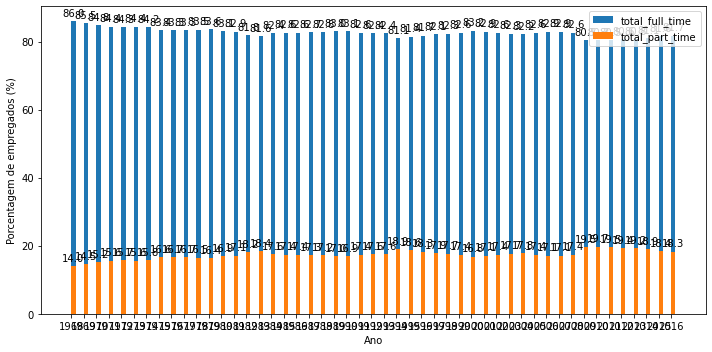

In [7]:
fig, ax = plt.subplots()
rects=[]
pi=1

for i in list(plot.keys())[:2]:
    v=plot.get(i)
    if pi%2==0:
        rects.append(ax.bar(x - width/2, v, width, label=i))
    else:
        rects.append(ax.bar(x + width/2, v, width, label=i))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem de empregados (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for r in rects:
    autolabel(r)

fig.tight_layout()

plt.show()